<a href="https://colab.research.google.com/github/raulc66/AI-Learning/blob/main/RNN_LSTM_for_IMDB_Review_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1 : Importing the libraries

In [ ]:
import tensorflow as tf
print(tf.__version__)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2 : Data Preprocessing

In [4]:
# importing the libraries
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [18]:
# loading the dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=20000) # taking the most frequent n words

In [19]:
x_train # varying length

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 82

In [20]:
# apply padding -> same len for all the numbers
x_train = pad_sequences(x_train, maxlen = 100)
x_test = pad_sequences(x_test, maxlen= 100)

In [21]:
x_train.shape, x_test.shape

((25000, 100), (25000, 100))

# Step 3 : Building the model

In [22]:
# define an object (initializing the RNN network)
model = tf.keras.models.Sequential()

In [23]:
# adding embedding layer --> used in order to compress input feature space into
# a compressed one --> a matrix multiplication layer that transforms words into
# their corresponding words embedding | turns positive integers into lengths of
# fixed size

model.add(tf.keras.layers.Embedding(input_dim = 20000, output_dim= 128, input_shape = (100,))) # can only be used as input layer, the input dimension must be equal to the number of the unique words

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
# adding LSTM layer --> used to understand the relationship between different elements of the sequence
model.add(tf.keras.layers.LSTM(units = 128, activation = 'tanh'))

In [25]:
# adding output layer
model.add(tf.keras.layers.Dense(units = 1, activation='sigmoid')) # binary output

In [27]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 100, 128)            │       2,560,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,691,713 (10.27 MB)

 Trainable params: 2,691,713 (10.27 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# compile the model
model.compile(optimizer='rmsprop', loss= 'binary_crossentropy', metrics = ['accuracy'])

# Step 4 : Training the model

In [29]:
history = model.fit(x_train, y_train, batch_size = 128, epochs = 5, validation_data=(x_test, y_test))

Epoch 1/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 119s 593ms/step - accuracy: 0.5895 - loss: 0.6538 - val_accuracy: 0.7924 - val_loss: 0.4635
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 142s 595ms/step - accuracy: 0.8205 - loss: 0.4091 - val_accuracy: 0.8454 - val_loss: 0.3596
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 102s 520ms/step - accuracy: 0.8659 - loss: 0.3271 - val_accuracy: 0.8496 - val_loss: 0.3438
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 156s 594ms/step - accuracy: 0.8856 - loss: 0.2804 - val_accuracy: 0.8373 - val_loss: 0.3772
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 141s 590ms/step - accuracy: 0.8994 - loss: 0.2528 - val_accuracy: 0.8506 - val_loss: 0.3605


In [30]:
# predictions
y_pred = (model.predict(x_test) > 0.5).astype(int)

782/782 ━━━━━━━━━━━━━━━━━━━━ 51s 64ms/step


In [32]:
print(y_pred[15]), print(y_test[15])

[0]
0


(None, None)

In [33]:
# confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[11223  1277]
 [ 2458 10042]]


In [35]:
acc_cm = accuracy_score(y_test, y_pred)
print(acc_cm)

0.8506


# Step 5 : Learning curve

In [36]:
def learning_curve(history, epoch):
  # training versus validation accuracy
  epoch_range = range(1, epoch +1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy ')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train','val'], loc= 'upper left')
  plt.show()



  # training versus validation loss

  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train','val'], loc= 'upper left')
  plt.show()

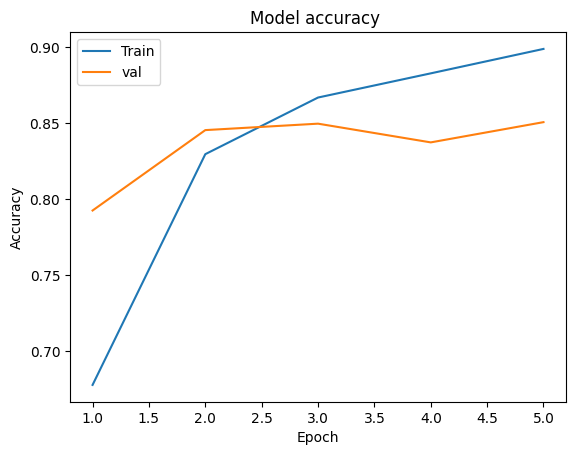

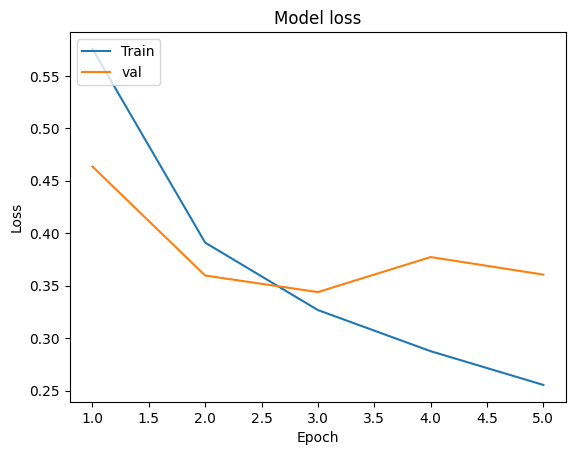

In [37]:
learning_curve(history, 5) # model learnt too much from the training data -> overfitted